### Ex1: Chol - ggplot2

In [1]:
#cho du lieu chol.txt
chol <- read.table("Chapter 12\\chol.txt", header = TRUE)
head(chol)

AGE,HEIGHT,WEIGHT,CHOL,SMOKE,BLOOD,MORT
20,176,77,195,nonsmo,b,alive
53,167,56,250,sigare,o,dead
44,170,80,304,sigare,a,dead
37,173,89,178,nonsmo,o,alive
26,170,71,206,sigare,o,alive
41,165,62,284,sigare,o,alive


In [2]:
#In thong ke chung ve du lieu
str(chol)

'data.frame':	200 obs. of  7 variables:
 $ AGE   : int  20 53 44 37 26 41 39 28 33 39 ...
 $ HEIGHT: int  176 167 170 173 170 165 174 171 180 166 ...
 $ WEIGHT: int  77 56 80 89 71 62 75 68 100 74 ...
 $ CHOL  : int  195 250 304 178 206 284 232 152 209 150 ...
 $ SMOKE : Factor w/ 3 levels "nonsmo","pipe",..: 1 3 3 1 3 3 3 2 3 3 ...
 $ BLOOD : Factor w/ 4 levels "a","ab","b","o": 3 4 1 4 4 4 4 1 1 1 ...
 $ MORT  : Factor w/ 2 levels "alive","dead": 1 2 2 1 1 1 1 1 1 1 ...


In [3]:
#Ve histograme cho cot AGE cua du lieu
library("ggplot2")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


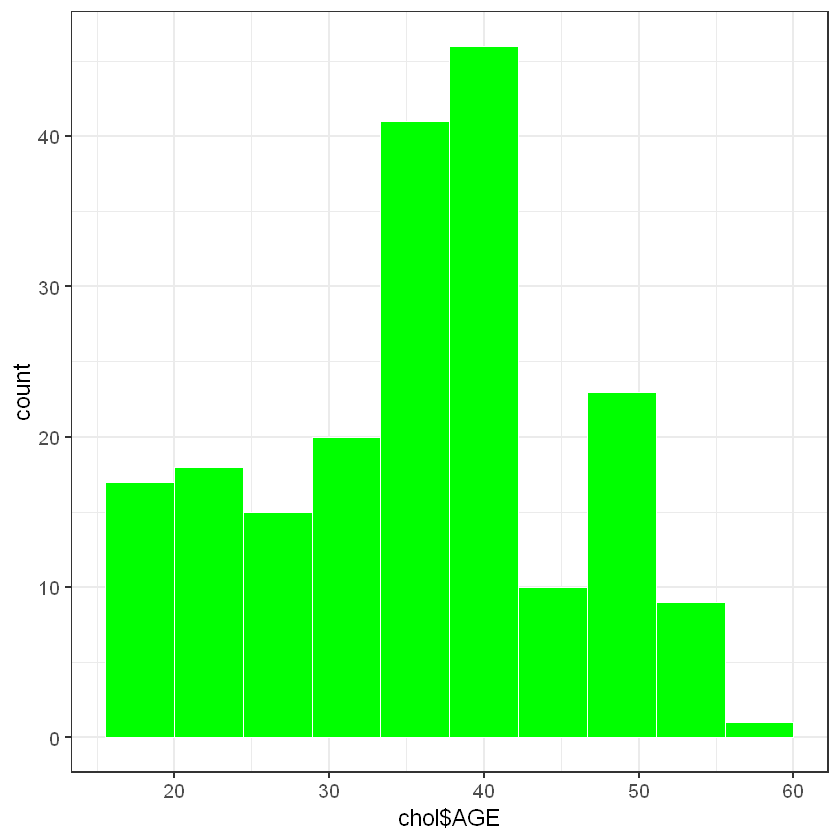

In [4]:
ggplot(data=chol, aes(chol$AGE)) +
        geom_histogram(color = "white", fill = "green", bins = 10) +
        theme_bw (base_size = 14)

In [5]:
#Ve scatter plot bieu dien moi quan he giu HEIGHT va WEIGTH
plot <- ggplot(data = chol, aes(x= chol$WEIGHT, y= chol$HEIGHT))
plot <- plot + geom_point() +
         geom_smooth(method="lm", se=F) +
         labs(y="HEIGHT",x="WEIGHT",  title="WEIGHT Vs HEIGHT")

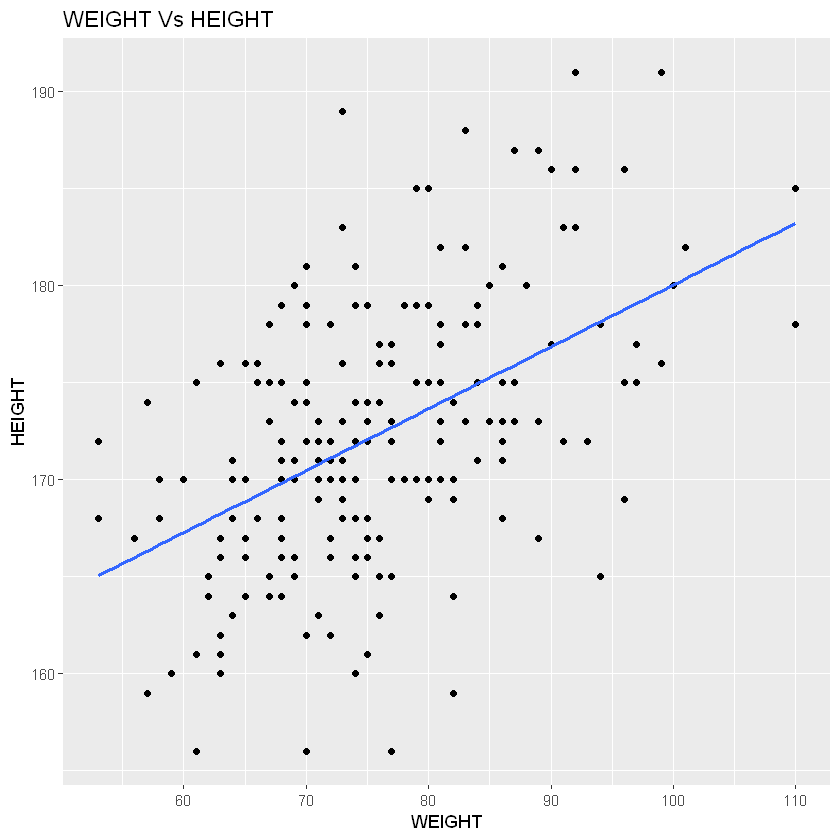

In [6]:
plot

In [7]:
library("ggExtra")

Warning message:
"package 'ggExtra' was built under R version 3.6.3"

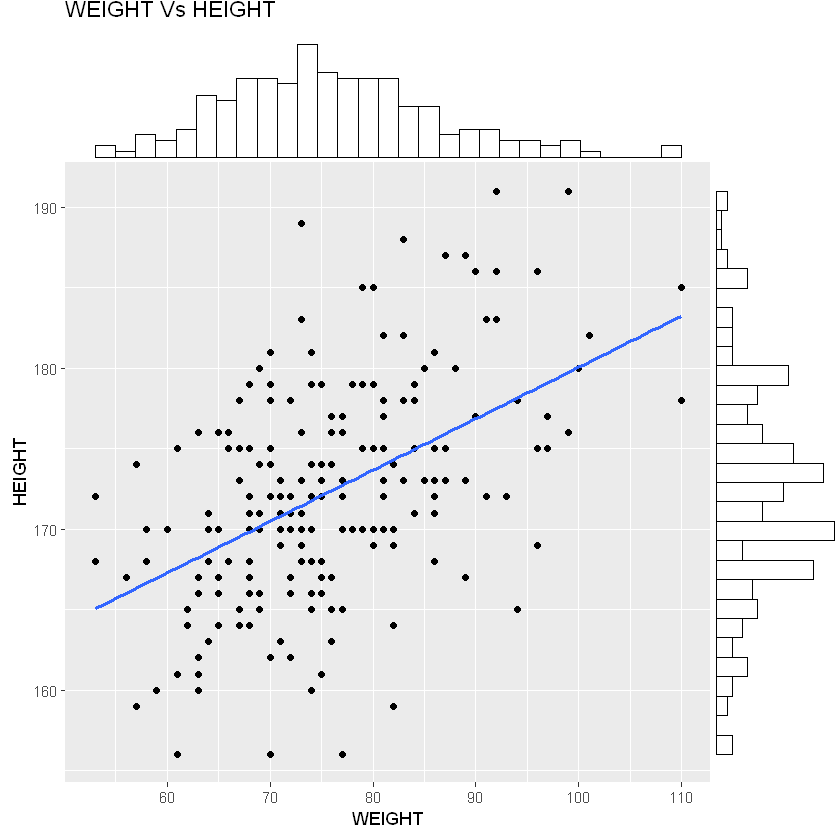

In [8]:
#Ve scatter plot bieu dien moi quan he giu HEIGHT va WEIGTH, co kem theo Histogram/boxplot
plot <- ggplot(data = chol, aes(x= chol$WEIGHT, y= chol$HEIGHT))
plot <- plot + geom_point() +
         geom_smooth(method="lm", se=F) +
         labs(y="HEIGHT",x="WEIGHT",  title="WEIGHT Vs HEIGHT")
ggMarginal(plot, type = "histogram", fill="transparent", bins = 30)

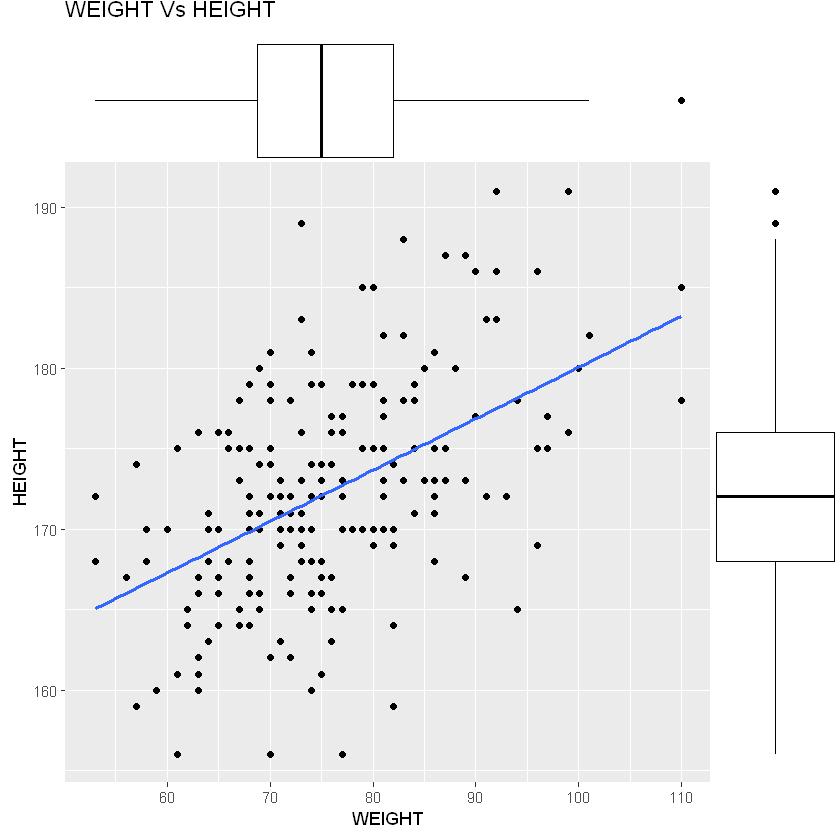

In [9]:
ggMarginal(plot, type = "boxplot", fill="transparent")

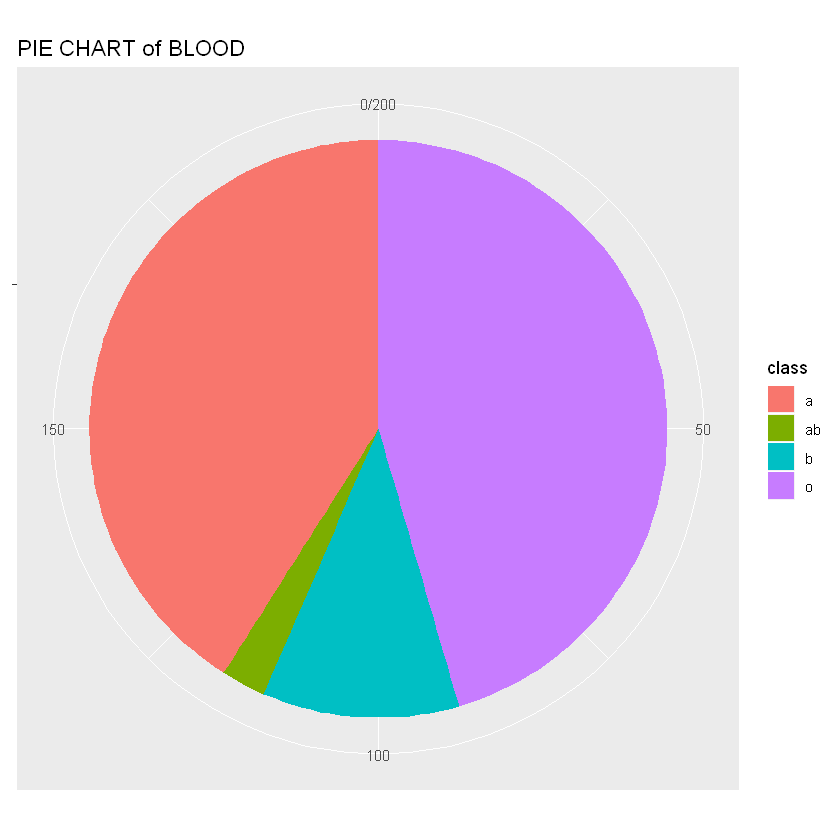

In [10]:
#Ve piechart bieu dien BLOOD
pie <- ggplot(data = chol,aes(x = "", fill = factor(BLOOD))) 
pie <- pie + geom_bar(width = 1) +
        labs(fill = "class", x= NULL, y= NULL, title="PIE CHART of BLOOD")
pie + coord_polar(theta = "y", start=0)

### Ex2: Housing Prices

In [11]:
#Cho du lieu landata_states.csv
#Doc va hien thi head cua du lieu
landdt_states <- read.csv("Chapter 12\\landdata_states.csv")
head(landdt_states)

State,region,Date,Home.Value,Structure.Cost,Land.Value,Land.Share..Pct.,Home.Price.Index,Land.Price.Index,Year,Qrtr
AK,West,2010.25,224952,160599,64352,28.6,1.481,1.552,2010,1
AK,West,2010.50,225511,160252,65259,28.9,1.484,1.576,2010,2
AK,West,2009.75,225820,163791,62029,27.5,1.486,1.494,2009,3
AK,West,2010.00,224994,161787,63207,28.1,1.481,1.524,2009,4
AK,West,2008.00,234590,155400,79190,33.8,1.544,1.885,2007,4
AK,West,2008.25,233714,157458,76256,32.6,1.538,1.817,2008,1


In [12]:
#In thong ke chung cua dl
summary(landdt_states)

     State          region          Date        Home.Value     Structure.Cost  
 AK     : 153   Midwest:1836   Min.   :1975   Min.   : 18763   Min.   : 17825  
 AL     : 153   N. East:1377   1st Qu.:1985   1st Qu.: 62235   1st Qu.: 53777  
 AR     : 153   South  :2448   Median :1994   Median :108724   Median : 88352  
 AZ     : 153   West   :1989   Mean   :1994   Mean   :135313   Mean   : 99534  
 CA     : 153   NA's   : 153   3rd Qu.:2004   3rd Qu.:172031   3rd Qu.:134871  
 CO     : 153                  Max.   :2013   Max.   :862885   Max.   :325595  
 (Other):6885                                                                  
   Land.Value     Land.Share..Pct. Home.Price.Index Land.Price.Index 
 Min.   :   938   Min.   : 5.00    Min.   :0.1350   Min.   : 0.0000  
 1st Qu.:  4178   1st Qu.: 5.00    1st Qu.:0.4550   1st Qu.: 0.0020  
 Median :  9478   Median :10.40    Median :0.7830   Median : 0.2520  
 Mean   : 35779   Mean   :18.17    Mean   :0.8695   Mean   : 0.9912  
 3rd Qu.: 

In [13]:
#In thong tin cu du lieu
str(landdt_states)

'data.frame':	7803 obs. of  11 variables:
 $ State           : Factor w/ 51 levels "AK","AL","AR",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ region          : Factor w/ 4 levels "Midwest","N. East",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Date            : num  2010 2010 2010 2010 2008 ...
 $ Home.Value      : int  224952 225511 225820 224994 234590 233714 232999 232164 231039 229395 ...
 $ Structure.Cost  : int  160599 160252 163791 161787 155400 157458 160092 162704 164739 165424 ...
 $ Land.Value      : int  64352 65259 62029 63207 79190 76256 72906 69460 66299 63971 ...
 $ Land.Share..Pct.: num  28.6 28.9 27.5 28.1 33.8 32.6 31.3 29.9 28.7 27.9 ...
 $ Home.Price.Index: num  1.48 1.48 1.49 1.48 1.54 ...
 $ Land.Price.Index: num  1.55 1.58 1.49 1.52 1.88 ...
 $ Year            : int  2010 2010 2009 2009 2007 2008 2008 2008 2008 2009 ...
 $ Qrtr            : int  1 2 3 4 4 1 2 3 4 1 ...


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

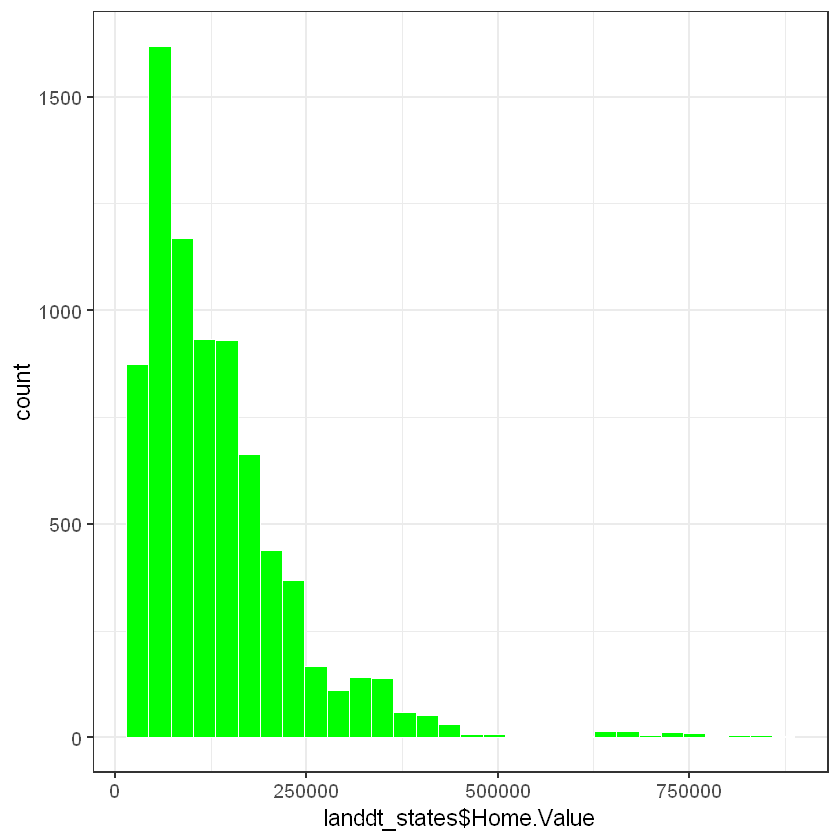

In [14]:
#Vẽ histogram cho cột Home.Value của dữ liệu 
ggplot(data=landdt_states, aes(landdt_states$Home.Value)) +
        geom_histogram(color = "white", fill = "green", bins = 30) +
        theme_bw (base_size = 14)

In [25]:
#Hãy lọc dữ liệu theo Date == 2010.25, sau đó vẽ scatter plot biểu diễn Land.Value vs Structure.Cost. 
dt.2010.25 <- landdt_states[ which(landdt_states$Date ==2010.25), ]

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

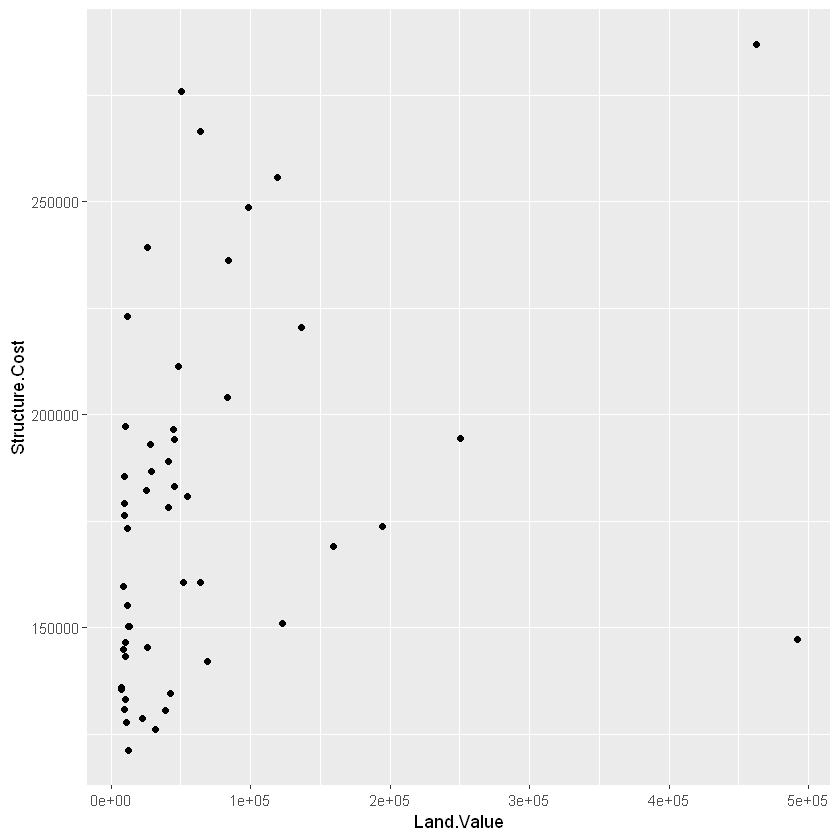

In [27]:
ggplot(dt.2010.25 , aes(y = Structure.Cost, x = Land.Value)) + 
        geom_point()

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsWarning message:
"Removed 1 rows containing missing values (geom_point)."

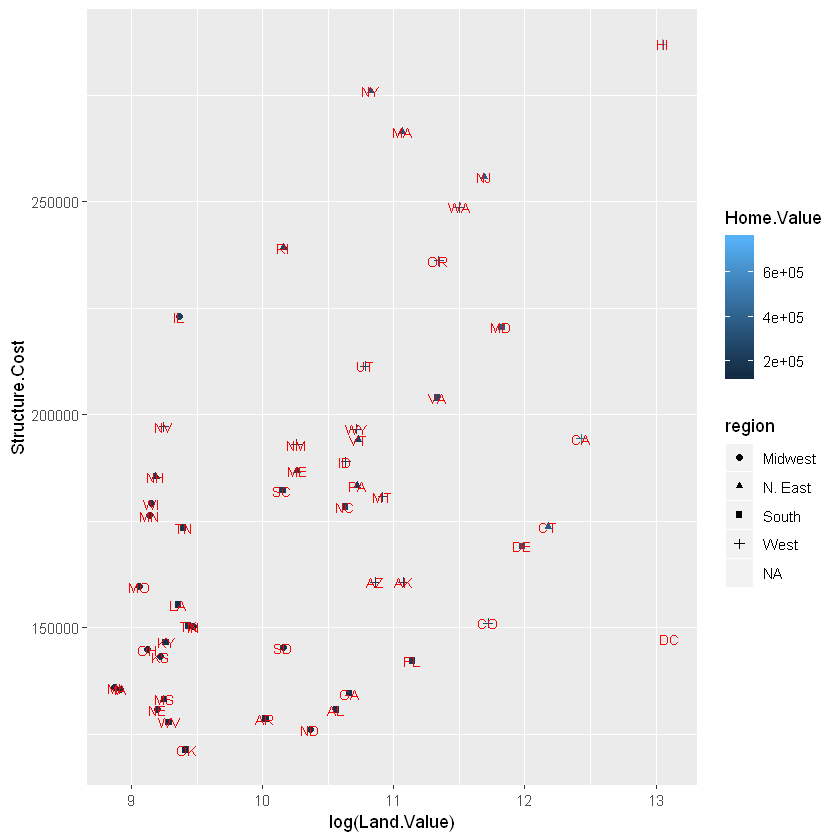

In [56]:
# Vẽ lại biểu đồ trên với Land.Value được chuẩn hóa bằng log. Gắn thêm state cho  cho tung diem du lieu
ggplot(dt.2010.25 , aes(y = Structure.Cost, x = log(Land.Value))) + 
        geom_point(aes(col=Home.Value, shape = region)) +
        geom_text(aes(label = State), size = 3, col = "red") 

### Ex3: EconomistData

In [57]:
#Cho du lieu EconomistData.csv
#Doc va hien thi head cua du lieu
EconomistData <- read.csv("Chapter 12\\EconomistData.csv")
head(EconomistData) 

Country,HDI.Rank,HDI,CPI,Region
Afghanistan,172,0.398,1.5,Asia Pacific
Albania,70,0.739,3.1,East EU Cemt Asia
Algeria,96,0.698,2.9,MENA
Angola,148,0.486,2.0,SSA
Argentina,45,0.797,3.0,Americas
Armenia,86,0.716,2.6,East EU Cemt Asia


In [58]:
#In thong ke chung ve du lieu
summary(EconomistData)

        Country       HDI.Rank           HDI              CPI       
 Afghanistan:  1   Min.   :  1.00   Min.   :0.2860   Min.   :1.500  
 Albania    :  1   1st Qu.: 47.00   1st Qu.:0.5090   1st Qu.:2.500  
 Algeria    :  1   Median : 96.00   Median :0.6980   Median :3.200  
 Angola     :  1   Mean   : 95.28   Mean   :0.6581   Mean   :4.052  
 Argentina  :  1   3rd Qu.:143.00   3rd Qu.:0.7930   3rd Qu.:5.100  
 Armenia    :  1   Max.   :187.00   Max.   :0.9430   Max.   :9.500  
 (Other)    :167                                                    
               Region  
 Americas         :31  
 Asia Pacific     :30  
 East EU Cemt Asia:18  
 EU W. Europe     :30  
 MENA             :18  
 SSA              :46  
                       

In [59]:
#In thong tin cua du lieu
str(EconomistData)

'data.frame':	173 obs. of  5 variables:
 $ Country : Factor w/ 173 levels "Afghanistan",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ HDI.Rank: int  172 70 96 148 45 86 2 19 91 53 ...
 $ HDI     : num  0.398 0.739 0.698 0.486 0.797 0.716 0.929 0.885 0.7 0.771 ...
 $ CPI     : num  1.5 3.1 2.9 2 3 2.6 8.8 7.8 2.4 7.3 ...
 $ Region  : Factor w/ 6 levels "Americas","Asia Pacific",..: 2 3 5 6 1 3 2 4 3 1 ...


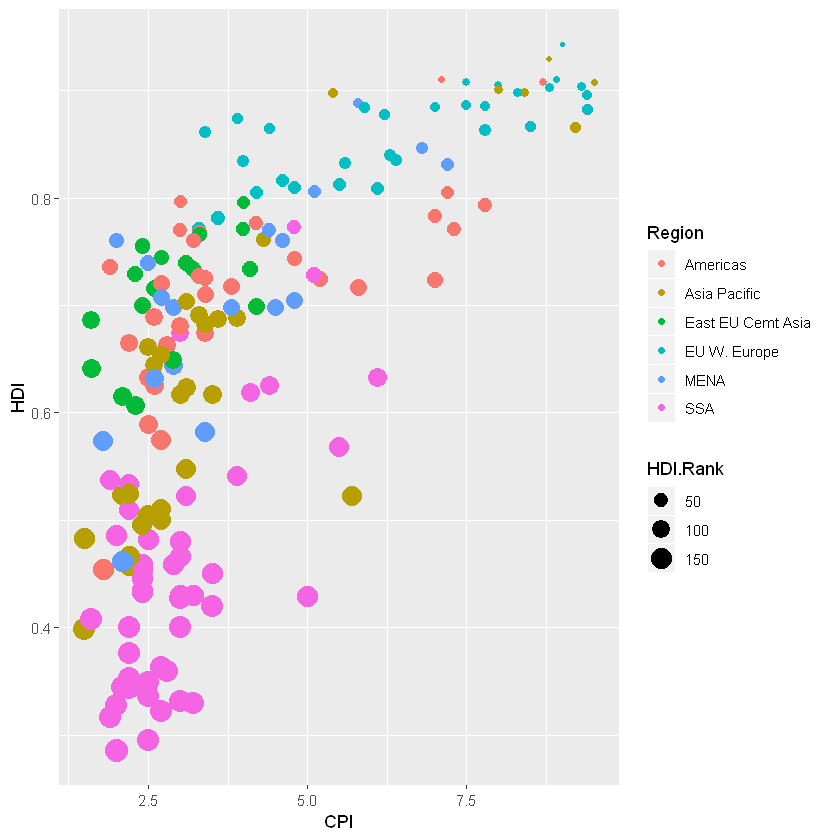

In [60]:
#Ve scatter plot bieu dien moi quan he cua CPI vs HDI, diem duoc to mau theo Region, do lon cua diem theo HDI.Rank
ggplot(EconomistData , aes(y = HDI, x = CPI)) + 
        geom_point(aes(col=Region, size = HDI.Rank)) 

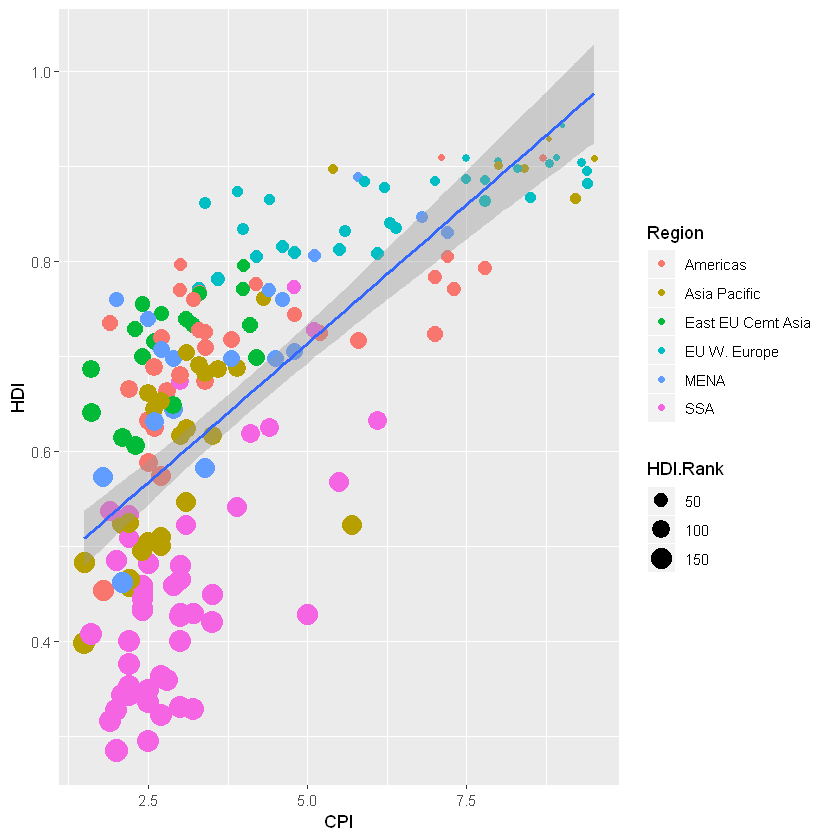

In [61]:
#Ve scatter plot bieu dien moi quan he cua CPI vs HDI co regression line
ggplot(EconomistData , aes(y = HDI, x = CPI)) + 
        geom_point(aes(col=Region, size = HDI.Rank))+
        geom_smooth(method = "lm")